<a href="https://colab.research.google.com/github/AustinAlgebra/data_science/blob/master/pacharz_districts_research_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Introduction
It is no secret that funding differs from district to district. In 2011 the Colorado Department of Education was sued for inadequate funding of public schools. Funding is extremely important to the operations of public schools. The dataset we are using can help us understand numerically how much funding differs from district to district.

The dataset contains financial data from U.S. school districts across the country from 1993 to 2016. It provides insight into where the money comes from and how funding and spending differ from district to district. 

For this analysis I am focused on two specific clients, Mapleton Public Schools and the Colorado Department of Education.


#2. Hypothesis
##Client: Mapleton Public Schools

###Mean Total Revenue per Enrollment:

H0=The mean total revenue per enrollment from 1993 to 2016 of other Denver Metro area districts is not statistically significantly different than the mean total revenue per enrollment from 1993 to 2016 for Mapleton Public Schools.

HA=The mean total revenue per enrollment from 1993 to 2016 of other Denver Metro area districts is statistically significantly different than the mean total revenue per enrollment from 1993 to 2016 for Mapleton Public Schools.

###Mean Total Expense per Enrollment

H0=The mean total expenses per enrollment from 1993 to 2016 of other Denver Metro area districts is not statistically significantly different than the mean total expenses per enrollment from 1993 to 2016 for Mapleton Public Schools.

HA=The mean total expenses per enrollment from 1993 to 2016 of other Denver Metro area districts is statistically significantly different than the mean total expenses per enrollment from 1993 to 2016 for Mapleton Public Schools.

##Client: Colorado Department of Education

###Mean Total Revenue per Enrollment

H0=The mean total revenue per enrollment for Colorado districts with enrollment between 41 and 6300 is not statistically significantly different from the mean total revenue per enrollment for Colorado districts with enrollment greater than or equal to 6300.

HA=The mean total revenue per enrollment for Colorado districts with enrollment between 41 and 6300 is statistically significantly different from the mean total revenue per enrollment for Colorado districts with enrollment greater than or equal to 6300.

###Mean Total Expense per Enrollment

H0=The mean total expenses per enrollment for Colorado districts with enrollment between 41 and 6300 is not statistically significantly different from the mean total expenses per enrollment for Colorado districts with enrollment greater than or equal to 6300.

HA=The mean total expenses per enrollment for Colorado districts with enrollment between 41 and 6300 is statistically significantly different from the mean total expenses per enrollment for Colorado districts with enrollment greater than or equal to 6300.

#3. Data

The dataset comes from Kaggle and can be found at [This Link](https://www.kaggle.com/noriuk/us-educational-finances). 
>You will need to download the districts.csv dataset and either upload it from your hard drive or from Google Drive. The code for both is included below.

The data contains null values in enrollment data for the year 1992. The analysis depends on enrollment data, so this year will be excluded from all dataframes.

For each district, that means we have 24 years of data from 1993 to 2016.

When splitting the data between rural (enrollment between 41 and 6300) and nonrural (enrollment greater than or equal to 6300), there were 149 rural districts, and 27 nonrural districts.

In [ ]:
#Set up the environment

%matplotlib inline
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
#This code will access file from computer:
#from google.colab import files
#data_to_load = files.upload()

#This code will access file from Google Drive:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#This code will access file from computer:
#districts = pd.read_csv('districts.csv')
#districts.head()

#This code will access file from Google Drive:
path = "/content/drive/My Drive/districts.csv"
districts = pd.read_csv(path)

#4. Methods

For this analysis I will create several dataframes. One for Mapleton Public Schools for years 1993-2016, as well as several similar dataframes for other Denver metro districts including Denver Public Schools and Boulder Valley School District.

I will also create a Colorado 2016 rural dataframe and a Colorado 2016 nonrural dataframe.

In [ ]:
# Creating a Colorado dataframe
colorado = districts[(districts['STATE']=='Colorado')]
# Adding columns for Total Revenue per Enrollment
# and Total Expense per Enrollment
colorado['REVPSTUD'] = colorado['TOTALREV'] / colorado['ENROLL']
colorado['EXPPSTUD'] = colorado['TOTALEXP'] / colorado['ENROLL']
colorado.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,STATE,ENROLL,NAME,YRDATA,TOTALREV,TFEDREV,TSTREV,TLOCREV,TOTALEXP,TCURINST,TCURSSVC,TCURONON,TCAPOUT,REVPSTUD,EXPPSTUD
1725,Colorado,7577.0,ADAMS SCHOOL DISTRICT 14,2016,92763,13676,43057,36030,80266,35628,33922,5216.0,1983,12.242708,10.593375
1726,Colorado,1100.0,BENNETT SCH DIST 29 J,2016,11586,219,3854,7513,9133,4586,2910,282.0,568,10.532727,8.302727
1727,Colorado,17069.0,BRIGHTON SCH DIST 27 J,2016,168507,7886,95124,65497,163817,79205,54778,6161.0,12391,9.872107,9.597340
1728,Colorado,8738.0,MAPLETON SCH DIST 1,2016,85902,5620,50224,30058,81212,45151,27074,4617.0,2499,9.830854,9.294118
1729,Colorado,1036.0,STRASBURG SCH DIST 31J,2016,10338,148,4643,5547,9181,5083,3207,310.0,204,9.978764,8.861969


In [ ]:
# Creating a Mapleton dataframe
mapleton = colorado[(colorado['NAME']=='MAPLETON SCH DIST 1')]
mapleton_clean = mapleton[(mapleton.ENROLL.notnull())]
# Creating a Boulder dataframe
boulder = colorado[(colorado['NAME'] == 'BOULDER VALLEY SCH DIST RE-2')]
boulder_clean = boulder[(boulder.ENROLL.notnull())]
# Creating a Denver dataframe
denver = colorado[(colorado['NAME']=='DENVER SCH DIST 1')]
denver_clean = denver[(denver['ENROLL'].notnull())]

<function matplotlib.pyplot.show>

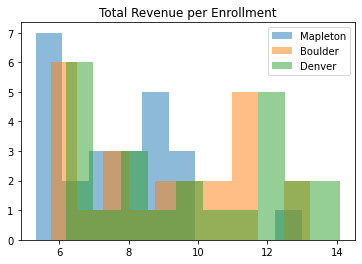

<Figure size 1440x720 with 0 Axes>

In [ ]:
# Creating a histogram of Total Revenue per Enrollment
plt.hist(mapleton_clean['REVPSTUD'], alpha = .5)
plt.hist(boulder_clean['REVPSTUD'], alpha = .5)
plt.hist(denver_clean['REVPSTUD'], alpha = .5)
plt.legend(['Mapleton', 'Boulder', 'Denver'])
plt.title('Total Revenue per Enrollment')
plt.figure(figsize=(20, 10))
plt.show

In [ ]:
# They do not look normal, checking skew and kurtosis.
print('Mapleton info:'+str(stats.describe(mapleton_clean['REVPSTUD'])))
print('Boulder info'+str(stats.describe(boulder_clean['REVPSTUD'])))
print('Denver info'+str(stats.describe(denver_clean['REVPSTUD'])))

Mapleton info:DescribeResult(nobs=24, minmax=(5.3221723152307066, 12.990850515463917), mean=7.653537605322597, variance=3.5999403054342904, skewness=0.7556115191101909, kurtosis=0.5730192204371045)
Boulder infoDescribeResult(nobs=24, minmax=(5.764293128503218, 13.226837776426537), mean=9.008561531196914, variance=5.809500679162278, skewness=0.04957620883788108, kurtosis=-1.3711611734218259)
Denver infoDescribeResult(nobs=24, minmax=(6.195143185846211, 14.095118302210894), mean=9.77352807791736, variance=7.029867730436997, skewness=-0.0016494628098824896, kurtosis=-1.4481737848574308)


In [ ]:
# The skew and kurtosis look okay, but the graph does not look normal
# Checking normality using Shapiro test
# H0 = Mapleton, Boulder, Cdenver Total Revenue per Enrollment are normally distributed
print('Mapleton Shapiro: {}'.format(stats.shapiro(mapleton_clean['REVPSTUD'])))
print('Boulder Shapiro: {}'.format(stats.shapiro(boulder_clean['REVPSTUD'])))
print('Denver Shapiro: {}'.format(stats.shapiro(denver_clean['REVPSTUD'])))

Mapleton Shapiro: (0.9168891310691833, 0.04987602308392525)
Boulder Shapiro: (0.9172996878623962, 0.05092403292655945)
Denver Shapiro: (0.9131414890289307, 0.04128313437104225)


In [ ]:
# Shapiro p-values are sufficiently low to reject null
# Total Revenue per Enrollment is not normally distributed
# Will try a Kruskall Test
# H0 = the mean ranks of these groups are the same
stats.kruskal(mapleton_clean['REVPSTUD'], boulder_clean['REVPSTUD'], denver_clean['REVPSTUD'])

KruskalResult(statistic=9.217465753424648, pvalue=0.009964436481283409)

In [ ]:
# Comparing Mapleton and Boulder
stats.kruskal(mapleton_clean['REVPSTUD'], boulder_clean['REVPSTUD'])

KruskalResult(statistic=4.423469387755091, pvalue=0.035447892552460884)

In [ ]:
# Comparing Mapleton and Denver
stats.kruskal(mapleton_clean['REVPSTUD'], denver_clean['REVPSTUD'])

KruskalResult(statistic=7.7487244897959044, pvalue=0.005375049092050544)

In [ ]:
# We reject the null, the mean ranks are statistically
# significantly different. Let's check the means.
print('Mapleton mean Total Revenue per Enrollment: {}'.format(mapleton_clean['REVPSTUD'].mean()))
print('Boulder mean Total Revenue per Enrollment: {}'.format(boulder_clean['REVPSTUD'].mean()))
print('Denver mean Total Revenue per Enrollment: {}'.format(denver_clean['REVPSTUD'].mean()))

Mapleton mean Total Revenue per Enrollment: 7.653537605322598
Boulder mean Total Revenue per Enrollment: 9.008561531196912
Denver mean Total Revenue per Enrollment: 9.77352807791736


In [ ]:
# Confidence interval
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print('Mapleton & Boulder: ' + get_95_ci(mapleton_clean['REVPSTUD'], boulder_clean['REVPSTUD']))

Mapleton & Boulder: The difference in means at the 95% confidence interval (two-tail) is between 0.12777584435163725 and 2.582272007396991.


In [ ]:
# Confidence interval
print('Mapleton & Denver: ' + get_95_ci(mapleton_clean['REVPSTUD'], denver_clean['REVPSTUD']))

Mapleton & Denver: The difference in means at the 95% confidence interval (two-tail) is between 0.8155833507158359 and 3.424397594473688.


Now checking total expense per student.

<function matplotlib.pyplot.show>

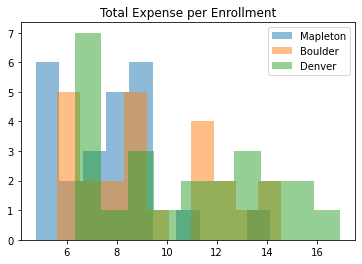

<Figure size 1440x720 with 0 Axes>

In [ ]:
# Creating a histogram of Total Expense per Enrollment
plt.hist(mapleton_clean['EXPPSTUD'], alpha = .5)
plt.hist(boulder_clean['EXPPSTUD'], alpha = .5)
plt.hist(denver_clean['EXPPSTUD'], alpha = .5)
plt.legend(['Mapleton', 'Boulder', 'Denver'])
plt.title('Total Expense per Enrollment')
plt.figure(figsize=(20, 10))
plt.show

In [ ]:
# They do not look normal, checking skew and kurtosis.
print('Mapleton info:'+str(stats.describe(mapleton_clean['EXPPSTUD'])))
print('Boulder info'+str(stats.describe(boulder_clean['EXPPSTUD'])))
print('Denver info'+str(stats.describe(denver_clean['EXPPSTUD'])))

Mapleton info:DescribeResult(nobs=24, minmax=(4.7673697270471465, 14.129123711340206), mean=7.67483072616336, variance=4.483985388158162, skewness=0.9924857312874349, kurtosis=1.6783047107240012)
Boulder infoDescribeResult(nobs=24, minmax=(5.63127994234112, 14.54978077895478), mean=9.339879950842162, variance=7.359881550729557, skewness=0.32239732751414024, kurtosis=-1.0778299671606957)
Denver infoDescribeResult(nobs=24, minmax=(6.3231864680824605, 16.932542126948928), mean=10.538247163010029, variance=10.819095409459726, skewness=0.25868710057768346, kurtosis=-1.183218818749823)


In [ ]:
# The skew and kurtosis look okay, but the graph does not look normal
# Checking normality using Shapiro test
# H0 = Mapleton, Boulder, Cdenver Total Revenue per Enrollment are normally distributed
print('Mapleton Shapiro: {}'.format(stats.shapiro(mapleton_clean['EXPPSTUD'])))
print('Boulder Shapiro: {}'.format(stats.shapiro(boulder_clean['EXPPSTUD'])))
print('Denver Shapiro: {}'.format(stats.shapiro(denver_clean['EXPPSTUD'])))

Mapleton Shapiro: (0.9016584753990173, 0.023342013359069824)
Boulder Shapiro: (0.9361894130706787, 0.1340934783220291)
Denver Shapiro: (0.92674320936203, 0.08245742321014404)


<function matplotlib.pyplot.show>

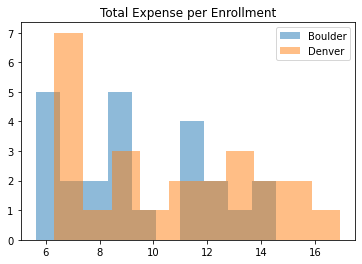

<Figure size 1440x720 with 0 Axes>

In [ ]:
# Boulder and Denver have too high of a p-value to reject null hypothesis
# Checking to see what histogram of just Boulder and Denver look like
# Creating a histogram of Total Revenue per Enrollment
plt.hist(boulder_clean['EXPPSTUD'], alpha = .5)
plt.hist(denver_clean['EXPPSTUD'], alpha = .5)
plt.legend(['Boulder', 'Denver'])
plt.title('Total Expense per Enrollment')
plt.figure(figsize=(20, 10))
plt.show

In [ ]:
# They still don't appear normal. We will run non-parametric tests
# Trying a Kruskall-Wallis Test
# H0 = the mean ranks of these groups are the same
stats.kruskal(
    mapleton_clean['EXPPSTUD'], 
    boulder_clean['EXPPSTUD'], 
    denver_clean['EXPPSTUD'])

KruskalResult(statistic=10.726598173515981, pvalue=0.004685422964652275)

In [ ]:
# Comparing Mapleton and Boulder
stats.kruskal(
    mapleton_clean['EXPPSTUD'], 
    boulder_clean['EXPPSTUD'])

KruskalResult(statistic=4.598639455782319, pvalue=0.03199733937639143)

In [ ]:
# Comparing Mapleton and Denver
stats.kruskal(
    mapleton_clean['EXPPSTUD'], 
    denver_clean['EXPPSTUD'])

KruskalResult(statistic=9.439200680272108, pvalue=0.002123960431569426)

In [ ]:
# The p-value is sufficiently small to reject the null
# The mean ranks are statistically significantly different
# Let's check the means.
print('Mapleton mean Total Expense per Enrollment: {}'.format(mapleton_clean['EXPPSTUD'].mean()))
print('Boulder mean Total Expense per Enrollment: {}'.format(boulder_clean['EXPPSTUD'].mean()))
print('Denver mean Total Expense per Enrollment: {}'.format(denver_clean['EXPPSTUD'].mean()))

Mapleton mean Total Expense per Enrollment: 7.67483072616336
Boulder mean Total Expense per Enrollment: 9.33987995084216
Denver mean Total Expense per Enrollment: 10.538247163010029


In [ ]:
# Confidence interval
print('Mapleton & Boulder: ' + get_95_ci(mapleton_clean['EXPPSTUD'], boulder_clean['EXPPSTUD']))

Mapleton & Boulder: The difference in means at the 95% confidence interval (two-tail) is between 0.2881656779141173 and 3.0419327714434843.


In [ ]:
# Confidence interval
print('Mapleton & Denver: ' + get_95_ci(mapleton_clean['EXPPSTUD'], denver_clean['EXPPSTUD']))

Mapleton & Denver: The difference in means at the 95% confidence interval (two-tail) is between 1.2983243842806322 and 4.428508489412706.


##Now comparing Rural and Non-Rural Districts.

In [ ]:
# Creating a Colorado 2016 Rural and Non-Rural dataframe
co_sixteen = colorado[(colorado['YRDATA']==2016)]
co_sixteen_rural = co_sixteen[(co_sixteen['ENROLL']>36) & (co_sixteen['ENROLL']<5852)]
co_sixteen_nonrural = co_sixteen[(co_sixteen['ENROLL']>=5852)]
print('Colorado 2016 Rural districts contain {} districts.'.format(co_sixteen_rural.shape[0]))
print('Colorado 2016 Non-Rural districts contain {} districts.'.format(co_sixteen_nonrural.shape[0]))

Colorado 2016 Rural districts contain 149 districts.
Colorado 2016 Non-Rural districts contain 28 districts.


Non-Rural: DescribeResult(nobs=28, minmax=(9.006571277159512, 14.095118302210894), mean=10.813903593735521, variance=1.6605376602352093, skewness=0.777369550245631, kurtosis=0.07278278063802324)
Rural: DescribeResult(nobs=149, minmax=(7.235584843492586, 162.08163265306123), mean=16.00749673073122, variance=183.4570257287457, skewness=8.736330746045542, kurtosis=89.6629653271222)


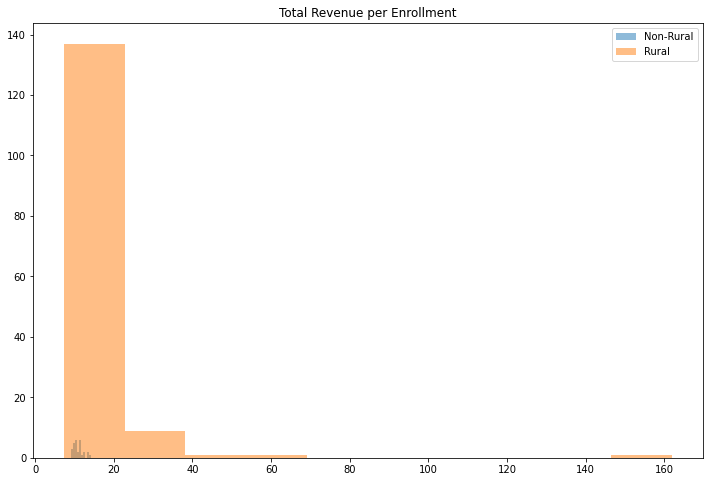

In [ ]:
plt.figure(figsize=[12,8])
plt.hist(co_sixteen_nonrural['REVPSTUD'], alpha = .5)
plt.hist(co_sixteen_rural['REVPSTUD'], alpha = .5)
plt.legend(['Non-Rural', 'Rural'])
plt.title('Total Revenue per Enrollment')
plt.show
print('Non-Rural: '+ str(stats.describe(co_sixteen_nonrural['REVPSTUD'])))
print('Rural: ' + str(stats.describe(co_sixteen_rural['REVPSTUD'])))

Text(0.5, 1.0, 'Non-Rural Total Expenses per Enrollment 2016')

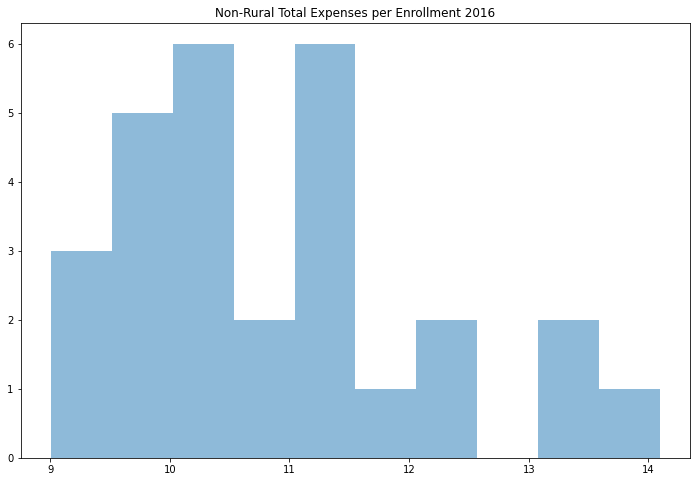

In [ ]:
# Non-rural has a skew and kurtosis in acceptable range for normality
# Rural is not in acceptable range
# It might be good to plot them separately to see what's going on
plt.figure(figsize=[12,8])
plt.hist(co_sixteen_nonrural['REVPSTUD'], alpha = .5)
plt.title('Non-Rural Total Expenses per Enrollment 2016')

Text(0.5, 1.0, 'Rural Total Expense per Enrollment 2016')

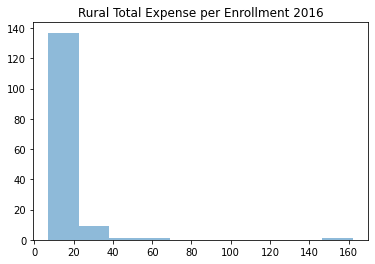

In [ ]:
# That does not look normal
# Let's check out Rural
plt.hist(co_sixteen_rural['REVPSTUD'], alpha = .5)
plt.title('Rural Total Expense per Enrollment 2016')

Rural: DescribeResult(nobs=144, minmax=(7.235584843492586, 28.945945945945947), mean=14.313736170359713, variance=18.675957891845147, skewness=1.1337689725727125, kurtosis=1.14944686034882)


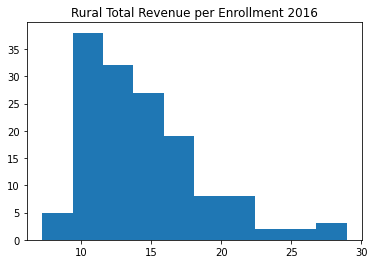

In [ ]:
# It seems like there are some outliers
# let's see what happens if we remove them
co_sixteen_rural_clean = co_sixteen_rural[(co_sixteen_rural['REVPSTUD']<30)]
plt.hist(co_sixteen_rural_clean['REVPSTUD'])
plt.title('Rural Total Revenue per Enrollment 2016')
print('Rural: '+str(stats.describe(co_sixteen_rural_clean['REVPSTUD'])))

<function matplotlib.pyplot.show>

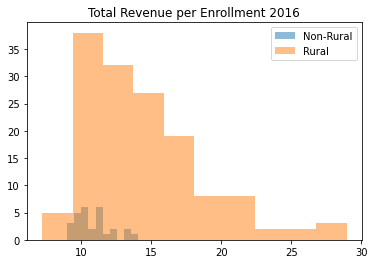

In [ ]:
plt.hist(co_sixteen_nonrural['REVPSTUD'], alpha = .5)
plt.hist(co_sixteen_rural_clean['REVPSTUD'], alpha = .5)
plt.legend(['Non-Rural', 'Rural'])
plt.title('Total Revenue per Enrollment 2016')
plt.show

In [ ]:
# This gets our skew and kurtosis to acceptable levels
# Let's see how many data points we eliminated
print('This eliminated {} datapoints.'.format(co_sixteen_rural.shape[0]-co_sixteen_rural_clean.shape[0]))

This eliminated 5 datapoints.


In [ ]:
# Cleaning the data only took out 5 data points,
# which leaves 144 datapoints, which should be enough.
# Let's check how normal this data is with a Shapiro test.
# H0 = Non-Rural, Rural Total Revenue per Enrollment are normally distributed
print('Non-Rural Shapiro: {}'.format(stats.shapiro(co_sixteen_nonrural['REVPSTUD'])))
print('Rural Shapiro: {}'.format(stats.shapiro(co_sixteen_rural_clean['REVPSTUD'])))

Non-Rural Shapiro: (0.9422252774238586, 0.12592163681983948)
Rural Shapiro: (0.9143113493919373, 1.5022943955500523e-07)


In [ ]:
# Even after getting rid of outliers, Rural has a p-value
# that is sufficiently low to reject the null.
# Rural is not normally distributed.
# Non-Rural we cannot reject the null.
# It is better to run non-parametric test.
# I will use Kruskall-Wallis test.
# H0 = the mean ranks of these groups are the same
stats.kruskal(co_sixteen_nonrural['REVPSTUD'], co_sixteen_rural_clean['REVPSTUD'])

KruskalResult(statistic=23.14891274428851, pvalue=1.4992795266673953e-06)

In [ ]:
# The p-value is sufficiently small to reject the null
# These groups have statistically significantly different mean ranks
print('The Non-Rural districts have a mean Total Revenue per Enrollment of {}'.format(co_sixteen_nonrural['REVPSTUD'].mean()))
print('The Rural districts have a mean Total Revenue per Enrollment of {}'.format(co_sixteen_rural_clean['REVPSTUD'].mean()))

The Non-Rural districts have a mean Total Revenue per Enrollment of 10.813903593735521
The Rural districts have a mean Total Revenue per Enrollment of 14.31373617035971


In [ ]:
# The p-value is sufficiently small to reject the null
# the mean rank of these two groups is statistically significantly different
# Confidence interval:
print('Rural & Non-Rural Total Rev per Enrollment: ' + get_95_ci(co_sixteen_nonrural['REVPSTUD'], co_sixteen_rural_clean['REVPSTUD']))

Rural & Non-Rural Total Rev per Enrollment: The difference in means at the 95% confidence interval (two-tail) is between 2.647741723833215 and 4.351923429415164.


Non-Rural: DescribeResult(nobs=28, minmax=(7.826905306162152, 14.806460907630077), mean=10.423483108705978, variance=2.7568673810249886, skewness=1.0847576352060189, kurtosis=1.1199566275338109)
Rural: DescribeResult(nobs=149, minmax=(6.892241379310345, 155.42857142857142), mean=15.3474363272364, variance=186.98200277137082, skewness=7.765854586544721, kurtosis=73.36148395605909)


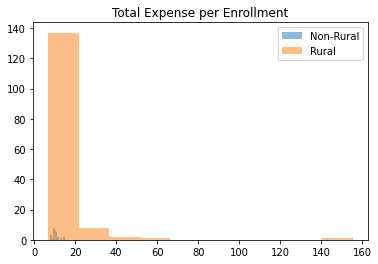

<Figure size 576x864 with 0 Axes>

In [ ]:
# Surprisingly, the Rural districts have a higher mean Total Revenue per Enrollment
# How do their expenses compare?
plt.hist(co_sixteen_nonrural['EXPPSTUD'], alpha = .5)
plt.hist(co_sixteen_rural['EXPPSTUD'], alpha = .5)
plt.legend(['Non-Rural', 'Rural'])
plt.title('Total Expense per Enrollment')
plt.figure(figsize=[8,12])
plt.show
print('Non-Rural: '+ str(stats.describe(co_sixteen_nonrural['EXPPSTUD'])))
print('Rural: ' + str(stats.describe(co_sixteen_rural['EXPPSTUD'])))

Non-Rural: DescribeResult(nobs=28, minmax=(7.826905306162152, 14.806460907630077), mean=10.423483108705978, variance=2.7568673810249886, skewness=1.0847576352060189, kurtosis=1.1199566275338109)
Rural: DescribeResult(nobs=142, minmax=(6.892241379310345, 29.675675675675677), mean=13.191461198227648, variance=15.386664726744387, skewness=1.1615234026358323, kurtosis=1.5561510783114851)


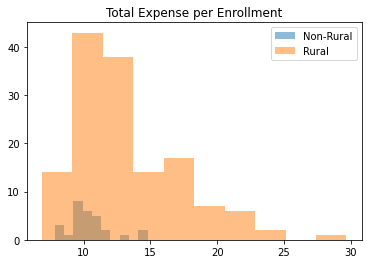

<Figure size 576x864 with 0 Axes>

In [ ]:
# Similar problem as Revenue, what if we use the same dataset
# without outliers as before?
co_sixteen_rural_clean_exp = co_sixteen_rural[(co_sixteen_rural['EXPPSTUD']<30)]
plt.hist(co_sixteen_nonrural['EXPPSTUD'], alpha = .5)
plt.hist(co_sixteen_rural_clean_exp['EXPPSTUD'], alpha = .5)
plt.legend(['Non-Rural', 'Rural'])
plt.title('Total Expense per Enrollment')
plt.figure(figsize=[8,12])
plt.show
print('Non-Rural: '+ str(stats.describe(co_sixteen_nonrural['EXPPSTUD'])))
print('Rural: ' + str(stats.describe(co_sixteen_rural_clean_exp['EXPPSTUD'])))

In [ ]:
# Both have an acceptable skew and kurtosis for normality
# Using the Shapiro test to confirm normality
# H0 = Non-Rural, Rural Total Expense per Enrollment are normally distributed
print('Non-Rural Shapiro: {}'.format(stats.shapiro(co_sixteen_nonrural['EXPPSTUD'])))
print('Rural Shapiro: {}'.format(stats.shapiro(co_sixteen_rural_clean_exp['EXPPSTUD'])))

Non-Rural Shapiro: (0.9071556925773621, 0.01689593866467476)
Rural Shapiro: (0.9167702198028564, 2.4968147727122414e-07)


In [ ]:
# p-value is sufficiently small to reject the null
# Both groups are not normally distributed
# Using Kruskal-Wallis test
# H0 = the mean rank of these two groups is the same
stats.kruskal(co_sixteen_nonrural['REVPSTUD'], co_sixteen_rural_clean_exp['REVPSTUD'])

KruskalResult(statistic=22.61682374951465, pvalue=1.977454245397159e-06)

In [ ]:
# The p-value is sufficiently small to reject the null
# the mean rank of these two groups is statistically significantly different
# Confidence interval:
print('Rural & Non-Rural Total Exp per Enrollment: ' + get_95_ci(co_sixteen_nonrural['EXPPSTUD'], co_sixteen_rural_clean_exp['EXPPSTUD']))

Rural & Non-Rural Total Exp per Enrollment: The difference in means at the 95% confidence interval (two-tail) is between 1.8766276175231433 and 3.6593285615201885.


In [ ]:
# But which one is higher?
print('The Non-Rural districts have a mean Total Exp per Enrollment of {}'.format(co_sixteen_nonrural['EXPPSTUD'].mean()))
print('The Rural districts have a mean Total Exp per Enrollment of {}'.format(co_sixteen_rural_clean_exp['EXPPSTUD'].mean()))

The Non-Rural districts have a mean Total Exp per Enrollment of 10.42348310870598
The Rural districts have a mean Total Exp per Enrollment of 13.191461198227646


#5. Results

##Client: Mapleton Public Schools

###Total Revenue per Enrollment

Total revenue per enrollment was not normally distributed for any of the three districts tested. Based on the Kruskall-Wallis test having a sufficently low p-value, I reject the null that the mean ranks of total revenue per enrollment was not statistically significantly different for the three districts. I then ran Kruskall-Wallis tests to individually compare Denver and Boulder to Mapleton and found that individually they have mean ranks significantly different from Mapleton.

The 95% confidence interval suggests that the difference in mean total revenue per enrollment between Mapleton and Boulder is between 0.1277 and 2.5823. 

The 95% confidence interval suggests that the difference in mean total revenue per enrollment between Mapleton and Denver is between 0.8156 and 3.4244. 

In both cases Mapleton has a lower mean total revenue per enrollment.

###Total Expense per Enrollment

Total expense per enrollment was not normally distrubted for any of the the three districts, either. Based on the Kruskall-Wallis test having a sufficently low p-value, I reject the null that the mean ranks of total expense per enrollment was not statistically significantly different for the three districts. I then ran Kruskall-Wallis tests to individually compare Denver and Boulder to Mapleton and found that individually they have mean ranks significantly different from Mapleton.

The 95% confidence interval suggests that the difference in mean total expense per enrollment between Mapleton and Boulder is between 0.2882 and 3.0419. 

The 95% confidence interval suggests that the difference in mean total revenue per enrollment between Mapleton and Denver is between 1.2983 and 4.4285.

In both cases, Mapleton has a lower mean total expense per enrollment.

##Client: Colorado Department of Education

###Total Revenue per Enrollment

By looking at the histograms, it was clear that there were some very high values for total revenue per enrollment for some rural districts. Because there were many more datapoints in the rural dataset, I decided to exclude the values that were much higher, limiting the total revenue per enrollment to 30. That showed more promising skew and kurtosis for being normally distributed. However, the Shapiro test showed a sufficiently low p-value, so I rejected the null that it was normally distruted. Surprisingly, the non-rural dataset did not show a sufficiently low p-value on the Shapiro test to reject the null that it was normally distributed. However, with one dataset showing non-normality and one showing signs of normality, I decided to proceed with a non-parametric test and used the Kruskal-Wallis test.

The Kruskall-Wallis showed a sufficiently low p-value to reject the null that the mean ranks are not significantly different. The 95% confidence interval suggests that the difference in total revenue per enrollment is between 2.4645 and 4.1261.

Rural districts had a higher mean total revenue per enrollment in 2016.

###Total Expense per Enrollment

Similarly to total revenue per enrollment, I decided to eliminate some higher values that were skewing the mean. Still, both datasets showed sufficiently low p-values on the Shapiro test to reject the null that they are normally distributed. When I ran the Kruskall-Wallis test, the p-value was sufficiently low to reject the null that the mean ranks are not significantly different.

The 95% confidence interval suggests that the difference in total expense per enrollment is between 1.6879 and 3.4303.

#6. Discussion and Recommendation

##Client: Mapleton Public Schools

This analysis has determined that Mapleton lags behind some of its neighbors in total revenue per enrollment and total expense per enrollment. As a next step in the process, let's compare more districts in the Denver Metro area. To understand where the difference lies, I would also look into percent of funding from federal, state, and local agencies to see where a discrepency might lie. Are other Adams County districts similarly low compared to Denver and Boulder? Are Adams county districts generally lower in local funding than other Denver Metro districts?

##Client: Colorado Department of Education

Total revenue per enrollment and total expense per enrollment are shown to be higher in rural districts than non-rural districts. As a next step in this process, let's look at where that discrepency in funding is coming from by comparing percent of funding from federal, state, and local agencies. Who is having to make up the difference for rural schools being more expensive?